In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import re  

# Download the stopwords list if you haven't already
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Federico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
path = "Scripts TBBT.csv"
df = pd.read_csv(path,sep=",", skipinitialspace = True, engine ="python")

In [4]:
# Let's choose a character to analyse

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


# 1.

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

To answer this question we will have to perform sentence and word tokenization. To do so we will lowercase the text immediately and remove the punctation only after sentence tokenization. 


In [68]:
# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Sentence Tokenization
df_character["sentences"] = df_character['dialogue'].apply(sent_tokenize)

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Split the text into words based on spaces
df_character["words"] = df_character['dialogue'].str.split()

# Using split instead of word_tokenize to handle apostrophes:
#  "there's" as single word, instead of 3 ("there" "'" "s")
# df_character["words"] = df_character['dialogue'].apply(word_tokenize)


# Display the DataFrame
df_character

,episode_name,dialogue,person_scene,sentences,words
1,Series 01 Episode 01 – Pilot Episode,so if a photon is directed through a plane wi...,Sheldon,[ so if a photon is directed through a plane w...,"[so, if, a, photon, is, directed, through, a, ..."
3,Series 01 Episode 01 – Pilot Episode,there’s no point i just think it’s a good ide...,Sheldon,"[ there’s no point, i just think it’s a good i...","[there’s, no, point, i, just, think, it’s, a, ..."
10,Series 01 Episode 01 – Pilot Episode,i think this is the place,Sheldon,[i think this is the place.],"[i, think, this, is, the, place]"
14,Series 01 Episode 01 – Pilot Episode,leonard i don’t think i can do this,Sheldon,"[ leonard, i don’t think i can do this.]","[leonard, i, don’t, think, i, can, do, this]"
16,Series 01 Episode 01 – Pilot Episode,no we are committing genetic fraud there’s no...,Sheldon,"[ no., we are committing genetic fraud., there...","[no, we, are, committing, genetic, fraud, ther..."
...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,uh breakfast yes lunch no i did have a cough ...,Sheldon,"[ uh, breakfast yes, lunch no., i did have a c...","[uh, breakfast, yes, lunch, no, i, did, have, ..."
54399,Series 10 Episode 24 – The Long Distance Disso...,how thoughtful thank you,Sheldon,"[how thoughtful., thank you.]","[how, thoughtful, thank, you]"
54401,Series 10 Episode 24 – The Long Distance Disso...,and i with you question are you seeking a rom...,Sheldon,"[ and i with you., question, are you seeking a...","[and, i, with, you, question, are, you, seekin..."
54403,Series 10 Episode 24 – The Long Distance Disso...,well that would raise a number of problems we...,Sheldon,"[ well, that would raise a number of problems....","[well, that, would, raise, a, number, of, prob..."


In [69]:
# Counting the words and the sentences per dialogue


df_character['words_count'] = df_character['words'].apply(lambda x: len(x))
df_character['sentences_count'] = df_character['sentences'].apply(lambda x: len(x))


df_character

,episode_name,dialogue,person_scene,sentences,words,words_count,sentences_count
1,Series 01 Episode 01 – Pilot Episode,so if a photon is directed through a plane wi...,Sheldon,[ so if a photon is directed through a plane w...,"[so, if, a, photon, is, directed, through, a, ...",54,2
3,Series 01 Episode 01 – Pilot Episode,there’s no point i just think it’s a good ide...,Sheldon,"[ there’s no point, i just think it’s a good i...","[there’s, no, point, i, just, think, it’s, a, ...",13,1
10,Series 01 Episode 01 – Pilot Episode,i think this is the place,Sheldon,[i think this is the place.],"[i, think, this, is, the, place]",6,1
14,Series 01 Episode 01 – Pilot Episode,leonard i don’t think i can do this,Sheldon,"[ leonard, i don’t think i can do this.]","[leonard, i, don’t, think, i, can, do, this]",8,1
16,Series 01 Episode 01 – Pilot Episode,no we are committing genetic fraud there’s no...,Sheldon,"[ no., we are committing genetic fraud., there...","[no, we, are, committing, genetic, fraud, ther...",36,4
...,...,...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,uh breakfast yes lunch no i did have a cough ...,Sheldon,"[ uh, breakfast yes, lunch no., i did have a c...","[uh, breakfast, yes, lunch, no, i, did, have, ...",21,2
54399,Series 10 Episode 24 – The Long Distance Disso...,how thoughtful thank you,Sheldon,"[how thoughtful., thank you.]","[how, thoughtful, thank, you]",4,2
54401,Series 10 Episode 24 – The Long Distance Disso...,and i with you question are you seeking a rom...,Sheldon,"[ and i with you., question, are you seeking a...","[and, i, with, you, question, are, you, seekin...",13,2
54403,Series 10 Episode 24 – The Long Distance Disso...,well that would raise a number of problems we...,Sheldon,"[ well, that would raise a number of problems....","[well, that, would, raise, a, number, of, prob...",19,3


We will now calculate the average words and sentences for episodes

In [70]:
total_episodes = df['episode_name'].nunique()

total_words = df_character['words_count'].sum()
total_sentences = df_character['sentences_count'].sum()

average_words_per_episode = total_words / total_episodes
print(f"Average words for episodes: {average_words_per_episode:.2f}")

average_sentences_per_episode = total_sentences / total_episodes
print(f"Average senteces for episodes: {average_sentences_per_episode:.2f}")


Average words for episodes: 740.90
Average senteces for episodes: 94.33


To calculate the average number of words and sentences for episode we have to:

1. Create a "season" column based on the "episode_name."
1. Group the data by the newly created "season" and episode.
1. Calculate the number of episodes in each season.
1. Calculate the total number of words for each episode within the selected character's dialogue.
1. Finally, compute the average number of words spoken per episode per season.

In [71]:
# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# For words

# Group by season and episode, calculate the sum of words for each episode
episode_word_counts = df_character.groupby(['season', 'episode_name'])['words_count'].sum().reset_index()

# Calculate the number of episodes in each season
season_episode_counts = episode_word_counts.groupby('season')['episode_name'].count()

# Calculate the total number of words per season
season_word_counts = episode_word_counts.groupby('season')['words_count'].sum()

# Compute the average number of words spoken per episode per season
average_words_per_episode_per_season = season_word_counts / season_episode_counts

print("Average Words Spoken per Episode per Season for Character:", assigned_character)
print(average_words_per_episode_per_season)

print(f"Average words for episodes: {average_words_per_episode:.2f}")

# For sentences

# Group by season and episode, calculate the sum of words for each episode
episode_sentences_counts = df_character.groupby(['season', 'episode_name'])['sentences_count'].sum().reset_index()

# Calculate the total number of words per season
season_sentences_counts = episode_sentences_counts.groupby('season')['sentences_count'].sum()

# Compute the average number of words spoken per episode per season
average_sentences_per_episode_per_season = season_sentences_counts / season_episode_counts

print("Average Words Spoken per Episode per Season for Character:", assigned_character)
print(average_sentences_per_episode_per_season)

print(f"Average sentences for episodes: {average_sentences_per_episode:.2f}")


Average Words Spoken per Episode per Season for Character: Sheldon
season
1     865.705882
2     846.565217
3     869.043478
4     768.750000
5     721.666667
6     661.916667
7     662.000000
8     700.583333
9     702.583333
10    656.333333
dtype: float64
Average words for episodes: 740.90
Average Words Spoken per Episode per Season for Character: Sheldon
season
1      94.176471
2     100.478261
3     110.391304
4     103.958333
5      95.833333
6      88.291667
7      88.208333
8      88.458333
9      90.000000
10     84.375000
dtype: float64
Average sentences for episodes: 94.33


There is a stable decrease in the average number of words spoken per episode and the average number of sentences per episode as the series progresses through all the seasons.

# 2. 

Globally, over all episodes within the first 10 seasons, how many times does your
character mention nouns, and person names? 

Make a Wordcloud of this tag/entity to
have a clear visualization which nouns/person names are mostly used by your character.

In [194]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


In [26]:
# Download the English language model if you haven't already

!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 2.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/12.8 MB 6.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/12.8 MB 7.6 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 9.2 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 10.0 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 10.9 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.8 MB 11.2 MB/s eta 0:00:01
     -------------- ------------------------- 4.8/12.8 MB 11.7 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB 12.0 MB/s eta 0:00:01
     ------------------- -------------------- 6.1/12.8 MB 12.5 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12

In [204]:
from nltk.corpus import stopwords
import re


# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
# df_character['dialogue'] = df_character['dialogue'].str.lower()

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Split the text into words based on spaces
df_character["words"] = df_character['dialogue'].str.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
df_character["words"] = df_character["words"].apply(lambda words: [word for word in words if word not in stop_words])


In [205]:
import spacy
from collections import Counter

# Load spaCy with the English language model
nlp = spacy.load("en_core_web_sm")


# Combine all words into a single string
all_words = " ".join(df_character['words'].astype(str))


# Process the combined text with spaCy
doc = nlp(all_words)

# Iterate through each token in the processed text

# Extract person names using NER
person_names_ner = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

# Count occurrences using Counter
name_counts = Counter(person_names_ner)

# Find the most mentioned name
most_mentioned_name = name_counts.most_common(10)

print("Most Mentioned Name:", most_mentioned_name)

Most Mentioned Name: [('Leonard', 745), ('Amy', 348), ('Howard', 134), ('Cooper', 74), ('Bernadette', 46), ('Koothrappali', 37), ('Fowler', 34), ('Lee', 30), ('Farrah', 30), ('Wolowitz', 22)]


Most Mentioned Name: [('Leonard', 745), ('Amy', 348), ('Howard', 134), ('Cooper', 74), ('Bernadette', 46), ('Koothrappali', 37), ('Fowler', 34), ('Lee', 30), ('Farrah', 30), ('Wolowitz', 22)]

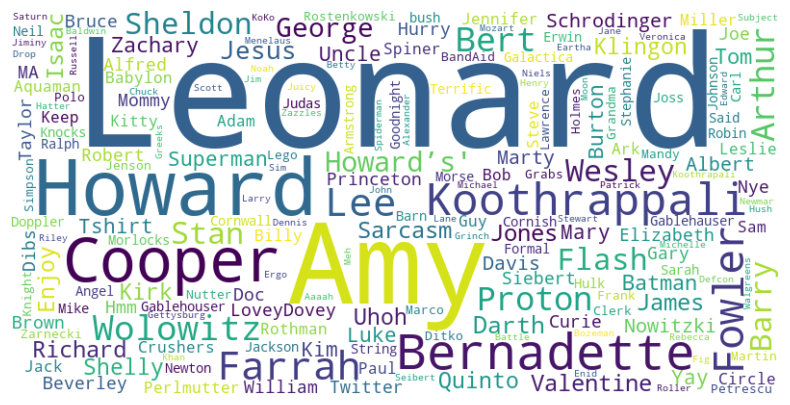

In [206]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(name_counts)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [208]:
# Extract nouns using POS tagging
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

# Count occurrences using Counter
noun_counts = Counter(nouns)

# Find the most mentioned noun
most_mentioned_noun = noun_counts.most_common(10)

print("Most Mentioned Noun:", most_mentioned_noun)


Most Mentioned Noun: [("'", 1154), ('knock', 579), ('Penny', 503), ('time', 358), ('need', 209), ('’d', 208), ('people', 193), ('way', 192), ('work', 191), ('A', 183)]


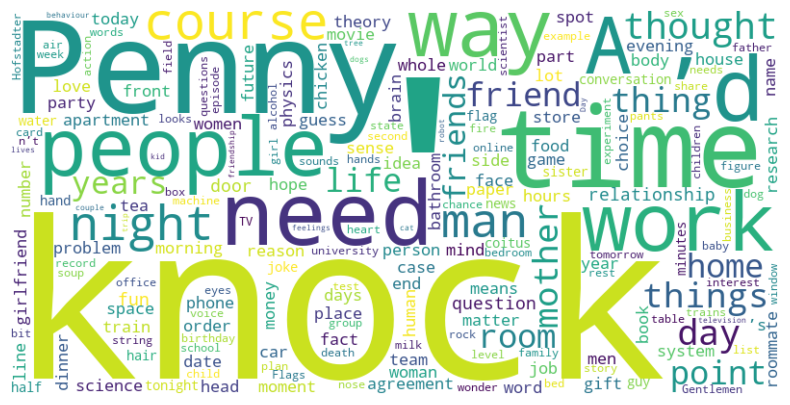

In [212]:
# Generate a WordCloud for nouns
wordcloud_nouns = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(noun_counts)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nouns, interpolation="bilinear")
plt.axis("off")
plt.show()


# 3.

What are the most important words mentioned by your character? Do this analysis
per episode, per season and overall over the first 10 seasons. To achieve this task,
please first make a bag-of-words and/or use the TF-IDF statistical principle. Remark:
You can try to make a Wordcloud for visualization, based on the given bag-of-words.

In [5]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

In [6]:
from nltk.corpus import stopwords
import re


# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
# df_character['dialogue'] = df_character['dialogue'].str.lower()

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Split the text into words based on spaces
df_character["words"] = df_character['dialogue'].str.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
df_character["words"] = df_character["words"].apply(lambda words: [word for word in words if word not in stop_words])


After cleaning and preprocessing the text data by removing punctuation, converting to lowercase, and removing stop words, we can proceed creating a bag-of-words (TF-IDF representation later)

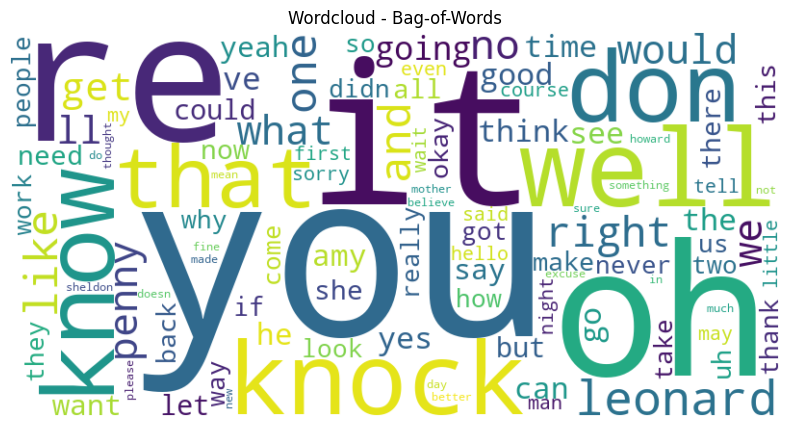

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Combine the lists of words into space-separated strings
df_character['cleaned_text'] = df_character['words'].apply(lambda x: ' '.join(x))

# Create a bag-of-words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df_character['cleaned_text'])

# Sum the counts across all documents to get the total frequency of each word
word_frequencies = np.sum(bow_matrix, axis=0)

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - Bag-of-Words')
plt.show()


In [32]:
# Identify the top 10 most frequent words
top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]
top_word_frequencies = [word_freq_dict[word] for word in top_words]

# Print the top 10 most frequent words and their frequencies
for word, frequency in zip(top_words, top_word_frequencies):
    print(f"{word}: {frequency} times")


you: 1831 times
it: 1262 times
oh: 1080 times
re: 1066 times
well: 916 times
knock: 854 times
know: 820 times
don: 808 times
that: 761 times
leonard: 745 times


'don' and 're' are clearly cut from 'don't' and 'you're.' I think this is okay, the alternative is to lose 'you' as an independent word.

Now we can do the same by series and episodes

In [70]:

# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# Initialize an empty list to store DataFrames for each season
season_dfs = []

# Loop through each season
for season in range(1, 11):
    # Filter the DataFrame for the current season using .loc
    season_df = df_character.loc[df_character['season'] == season].copy()

    # Combine the lists of words into space-separated strings
    season_df['cleaned_text'] = season_df['words'].apply(lambda x: ' '.join(x))

    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(season_df['cleaned_text'])

    # Sum the counts across all documents to get the total frequency of each word
    word_frequencies = np.sum(bow_matrix, axis=0)

    # Create a dictionary of word frequencies
    word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

    # Identify the top 10 most frequent words for the current season
    top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]

    # Create a DataFrame for the current season's top words
    season_top_words_df = pd.DataFrame({'Season': [season] * 10, 'Top Words': top_words})

    # Append the DataFrame to the list
    season_dfs.append(season_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_season = pd.concat(season_dfs, ignore_index=True)

# Print the results
for season in range(1, 11):
    print(f"Season {season}: ", end="")
    for word in range(0, 9):
        words_for_season = top_words_per_season.loc[top_words_per_season['Season'] == season, 'Top Words'].iloc[word]
        print(f"{words_for_season} ", end="")
    print()  # Add a newline after each season


Season 1: you it don well re leonard would no knock 
Season 2: you it re leonard don penny oh that well 
Season 3: you knock it re leonard don oh penny that 
Season 4: you it knock re oh leonard don penny that 
Season 5: you it oh re knock and don leonard know 
Season 6: you it re oh knock know well like don 
Season 7: you oh re it know well don that one 
Season 8: you it oh well re know and like that 
Season 9: you well oh it know re like that and 
Season 10: you oh it re know well that like and 


In [77]:
import re

# Extract season and episode numbers using regular expressions
season_episode_pattern = re.compile(r'Series (\d+) Episode (\d+)')
matches = df_character['episode_name'].str.extract(season_episode_pattern)

# Combine the extracted season and episode numbers to create the new column
df_character['season_episode'] = matches[0].str.zfill(2) + '-' + matches[1].str.zfill(2)

# Print the DataFrame to check the new column
print(df_character[['episode_name', 'season_episode']])


                                            episode_name season_episode
1                   Series 01 Episode 01 – Pilot Episode          01-01
3                   Series 01 Episode 01 – Pilot Episode          01-01
10                  Series 01 Episode 01 – Pilot Episode          01-01
14                  Series 01 Episode 01 – Pilot Episode          01-01
16                  Series 01 Episode 01 – Pilot Episode          01-01
...                                                  ...            ...
54397  Series 10 Episode 24 – The Long Distance Disso...          10-24
54399  Series 10 Episode 24 – The Long Distance Disso...          10-24
54401  Series 10 Episode 24 – The Long Distance Disso...          10-24
54403  Series 10 Episode 24 – The Long Distance Disso...          10-24
54405  Series 10 Episode 24 – The Long Distance Disso...          10-24

[11484 rows x 2 columns]


In [79]:
# Initialize an empty list to store DataFrames for each episode
episode_dfs = []

# Loop through each episode
for season_episode in df_character['season_episode'].unique():
    # Filter the DataFrame for the current episode using .loc
    episode_df = df_character.loc[df_character['season_episode'] == season_episode].copy()

    # Combine the lists of words into space-separated strings
    episode_df['cleaned_text'] = episode_df['words'].apply(lambda x: ' '.join(x))

    # Create a bag-of-words representation for the current episode
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(episode_df['cleaned_text'])

    # Sum the counts across all documents to get the total frequency of each word
    word_frequencies = np.sum(bow_matrix, axis=0)

    # Create a dictionary of word frequencies
    word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

    # Identify the top 10 most frequent words for the current episode
    top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]

    # Create a DataFrame for the current episode's top words
    episode_top_words_df = pd.DataFrame({'Episode': [season_episode] * 10, 'Top Words': top_words})

    # Append the DataFrame to the list
    episode_dfs.append(episode_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_episode = pd.concat(episode_dfs, ignore_index=True)



In [86]:
# Print the results
for episode_name in df_character['season_episode'].unique():
    print(f"{episode_name}: ", end="")
    for word in range(0, 5):
        words_for_episode = top_words_per_episode.loc[top_words_per_episode['Episode'] == episode_name, 'Top Words'].iloc[word]
        print(f"{words_for_episode} ", end="")
    print()  # Add a newline after each episode

01-01: it you re that think 
01-02: penny you don re we 
01-03: don oh well leonard think 
01-04: re going it oh well 
01-05: you boy big don leonard 
01-06: you well costume he re 
01-07: it one halo night penny 
01-08: it princess punchali would and 
01-09: you don re it no 
01-10: knock leonard penny it would 
01-11: please sick well would need 
01-12: you would re ve it 
01-13: team answer don it well 
01-14: time it machine go oh 
01-15: you don sister missy okay 
01-16: leonard don he it one 
01-17: you well would cat leonard 
02-01: you secret that don oh 
02-02: you leonard well it leslie 
02-03: you penny re well oh 
02-04: would could hot new people 
02-05: go you don know knock 
02-06: yes don it oh you 
02-07: you knock penny right all 
02-08: going don leonard spock star 
02-09: you it leonard re see 
02-10: leonard three is like she 
02-11: you it gift leonard no 
02-12: we monte robot kripke you 
02-13: it you friends kripke re 
02-14: leonard money penny know right 
02-